## Football Win Predictions – FIFA World Cup 2022

In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#loading and checking the dataset

# Set the CSV file path
file_path = r"C:\Users\aquil\Desktop\fifa_world_cup_22.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the data
df.head()


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20-Nov-22,17:00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21-Nov-22,14:00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21-Nov-22,17:00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21-Nov-22,20:00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22-Nov-22,11:00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [3]:
#cleaning and preparing the data

# Remove '%' from possession columns and convert to float
df['possession team1'] = df['possession team1'].str.replace('%', '').astype(float)
df['possession team2'] = df['possession team2'].str.replace('%', '').astype(float)

# Convert goals columns to numeric
df['number of goals team1'] = pd.to_numeric(df['number of goals team1'], errors='coerce')
df['number of goals team2'] = pd.to_numeric(df['number of goals team2'], errors='coerce')

# Drop rows with missing goal values
df.dropna(subset=['number of goals team1', 'number of goals team2'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42.0,50.0,8%,0,2,20-Nov-22,17:00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72.0,19.0,9%,6,2,21-Nov-22,14:00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44.0,45.0,11%,0,2,21-Nov-22,17:00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51.0,39.0,10%,1,1,21-Nov-22,20:00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64.0,24.0,12%,1,2,22-Nov-22,11:00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [ ]:
#feature engineering and setting up the data for machine learning

# Define match result: 1 = team1 wins, 0 = draw, -1 = team2 wins
def get_result(row):
    if row['number of goals team1'] > row['number of goals team2']:
        return 1
    elif row['number of goals team1'] == row['number of goals team2']:
        return 0
    else:
        return -1

df['match_result'] = df.apply(get_result, axis=1)

features = [
    'possession team1', 'possession team2',
    'goal preventions team1', 'goal preventions team2',
    'forced turnovers team1', 'forced turnovers team2',
    'defensive pressures applied team1', 'defensive pressures applied team2'
]

X = df[features]
y = df['match_result']


In [ ]:
#exploratory data analysis (EDA)

# Number of matches
print(f"Total matches in dataset: {len(df)}")

# Most frequent teams
teams = pd.concat([df['team1'], df['team2']])
top_teams = teams.value_counts().head(10)
print("\nTop 10 most frequent teams:\n", top_teams)

# Average stats
print("\nAverage statistics:\n", df[['possession team1', 'possession team2', 'number of goals team1', 'number of goals team2']].mean())


Total matches in dataset: 64

Top 10 most frequent teams:
 ARGENTINA         7
CROATIA           7
FRANCE            7
MOROCCO           7
NETHERLANDS       5
ENGLAND           5
BRAZIL            5
PORTUGAL          5
KOREA REPUBLIC    4
AUSTRALIA         4
dtype: int64

Average statistics:
 possession team1         44.625000
possession team2         43.531250
number of goals team1     1.578125
number of goals team2     1.109375
dtype: float64


In [ ]:
#prepping the data for modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#model training and prediction phase

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


In [ ]:
#evaluating the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.46153846153846156

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.40      0.57         5
           0       0.33      0.25      0.29         4
           1       0.38      0.75      0.50         4

    accuracy                           0.46        13
   macro avg       0.57      0.47      0.45        13
weighted avg       0.60      0.46      0.46        13


Confusion Matrix:
 [[2 1 2]
 [0 1 3]
 [0 1 3]]


In [ ]:
#model comparison

from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

# Evaluate both models
rf_acc = accuracy_score(y_test, y_pred)
log_acc = accuracy_score(y_test, log_pred)

print("Random Forest Accuracy:", rf_acc)
print("Logistic Regression Accuracy:", log_acc)


Random Forest Accuracy: 0.46153846153846156
Logistic Regression Accuracy: 0.6153846153846154


C:\Users\aquil\AppData\Local\Temp\ipykernel_7824\703069614.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='Set1')


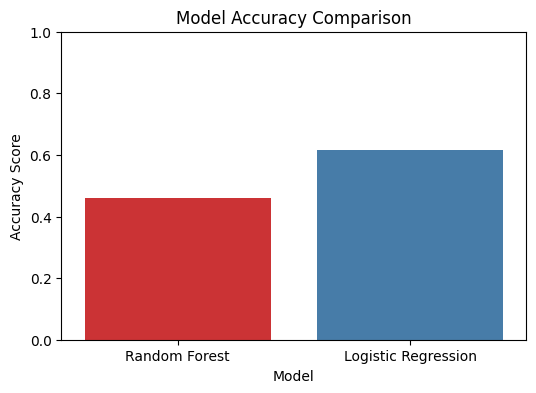

In [ ]:
#visualizing the model accuracy

accuracy_data = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [rf_acc, log_acc]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='Set1')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()


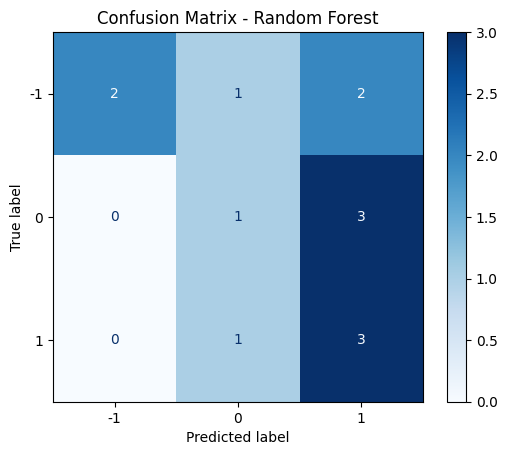

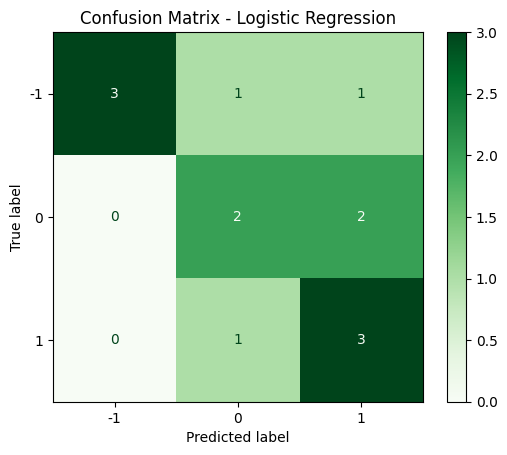

In [ ]:
#visualizing the confusion matrices for both models

from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


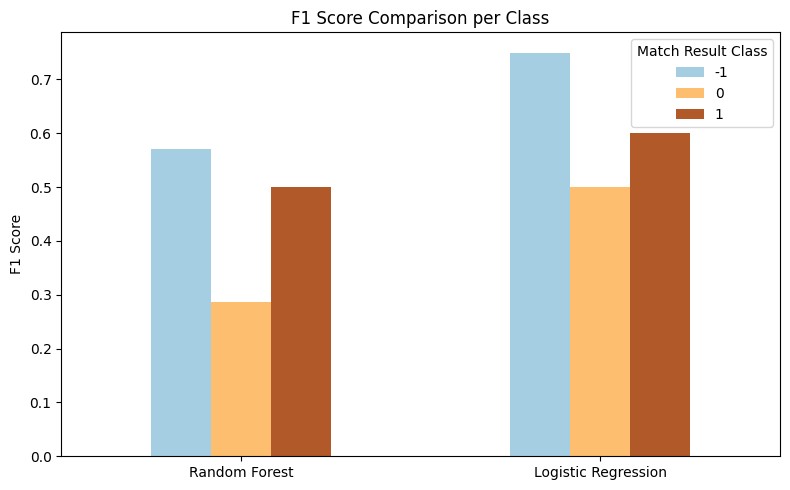

In [ ]:
#comparing the F1 scores for both models

rf_report = classification_report(y_test, y_pred, output_dict=True)
log_report = classification_report(y_test, log_pred, output_dict=True)

metrics_df = pd.DataFrame({
    'Random Forest': {k: v['f1-score'] for k, v in rf_report.items() if k in ['-1', '0', '1']},
    'Logistic Regression': {k: v['f1-score'] for k, v in log_report.items() if k in ['-1', '0', '1']}
}).T

metrics_df.plot(kind='bar', figsize=(8, 5), colormap='Paired')
plt.title("F1 Score Comparison per Class")
plt.ylabel("F1 Score")
plt.xticks(rotation=0)
plt.legend(title="Match Result Class", loc='upper right')
plt.tight_layout()
plt.show()


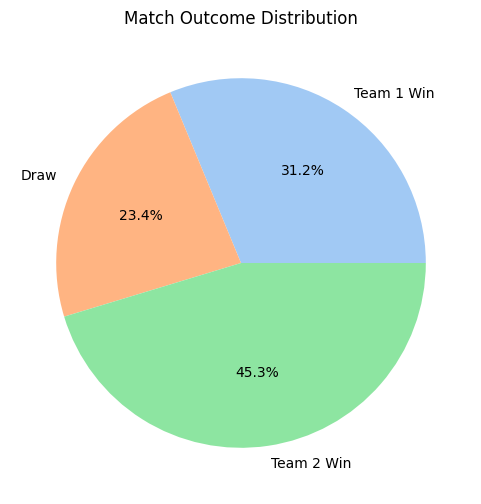

In [ ]:
#visualization of match outcomes

labels = ['Team 1 Win', 'Draw', 'Team 2 Win']
sizes = df['match_result'].value_counts().sort_index().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Match Outcome Distribution")
plt.show()


C:\Users\aquil\AppData\Local\Temp\ipykernel_7824\1198710356.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_possession.values, y=avg_possession.index, palette='magma')


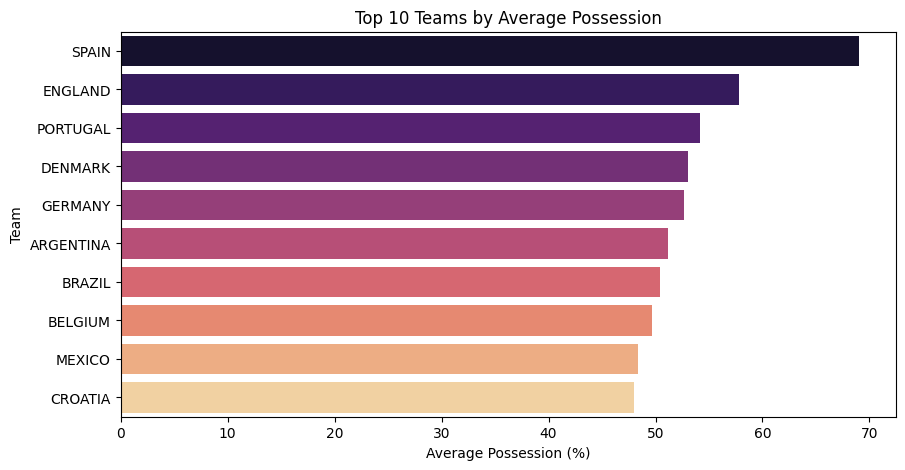

In [ ]:
#visualizing the average possession for teams

# Combine possession data
possession_data = pd.concat([
    df[['team1', 'possession team1']].rename(columns={'team1': 'Team', 'possession team1': 'Possession'}),
    df[['team2', 'possession team2']].rename(columns={'team2': 'Team', 'possession team2': 'Possession'})
])

avg_possession = possession_data.groupby('Team')['Possession'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_possession.values, y=avg_possession.index, palette='magma')
plt.title("Top 10 Teams by Average Possession")
plt.xlabel("Average Possession (%)")
plt.ylabel("Team")
plt.show()


C:\Users\aquil\AppData\Local\Temp\ipykernel_7824\123822998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='plasma')


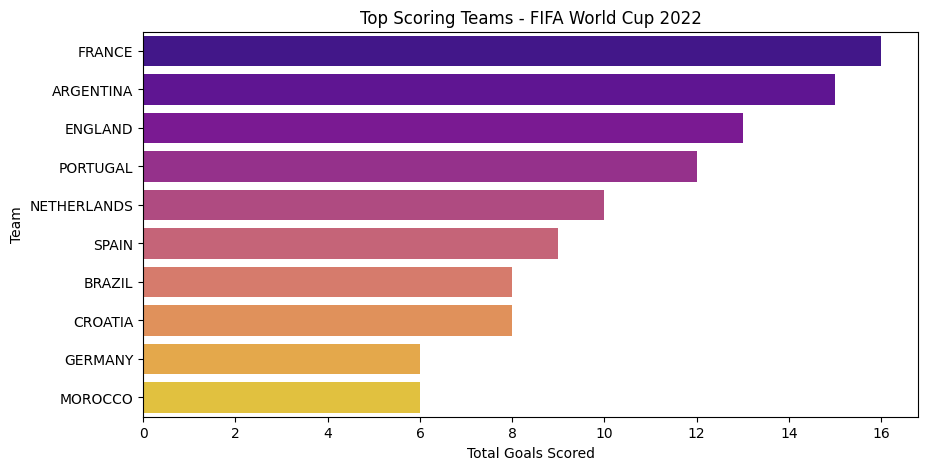

In [ ]:
#visualizing the top scoring teams

# Create long format goal data
goal_data = pd.DataFrame({
    'Team': pd.concat([df['team1'], df['team2']]),
    'Goals': pd.concat([df['number of goals team1'], df['number of goals team2']])
})

top_scorers = goal_data.groupby('Team')['Goals'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='plasma')
plt.title("Top Scoring Teams - FIFA World Cup 2022")
plt.xlabel("Total Goals Scored")
plt.ylabel("Team")
plt.show()


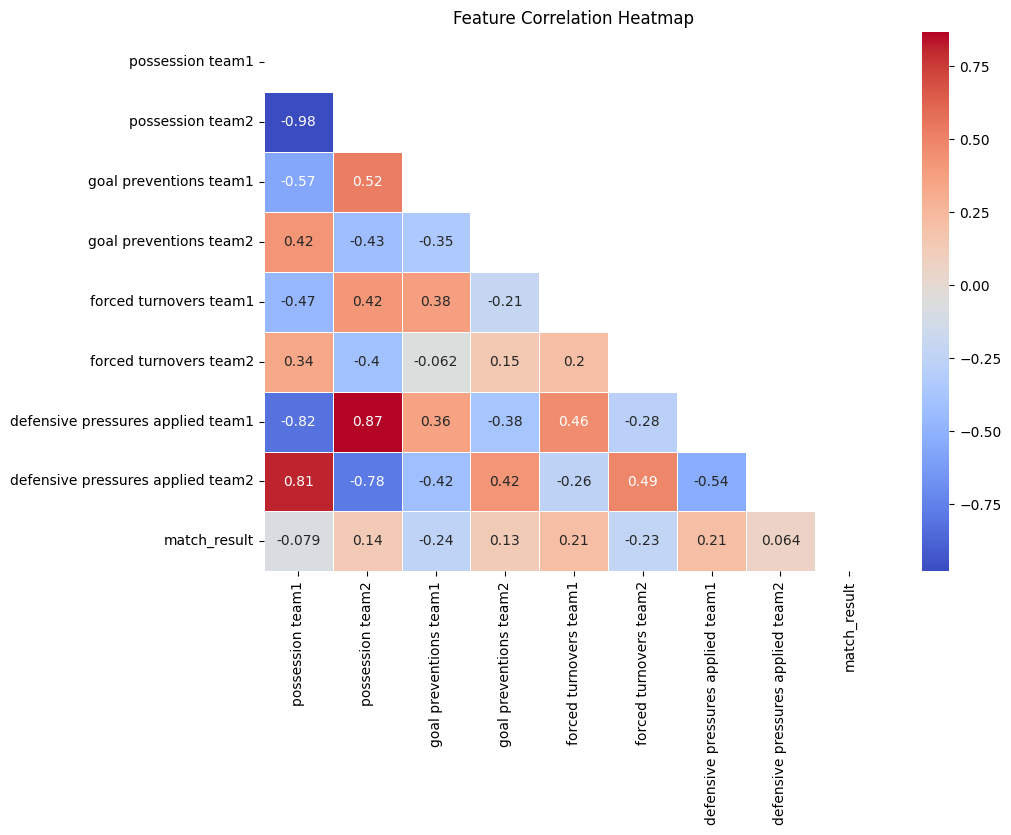

In [ ]:
#correlation heatmap that visualizes the relationships between various features

plt.figure(figsize=(10, 7))
correlation_matrix = df[features + ['match_result']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()


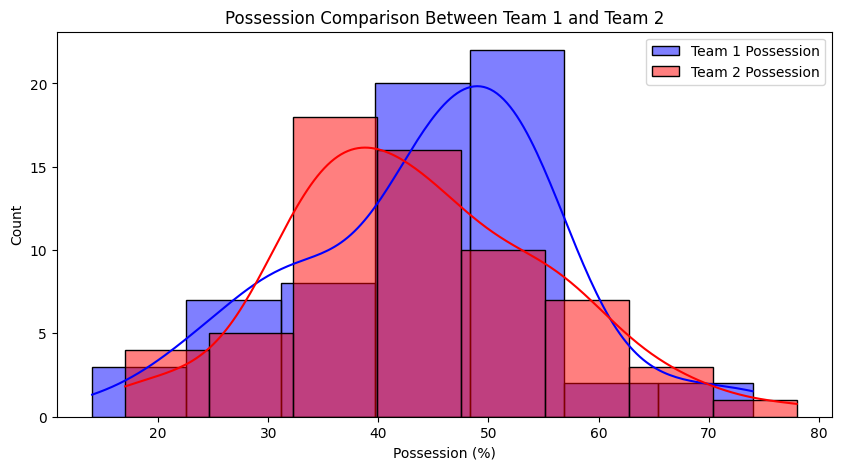

In [ ]:
#visualization of Possession Comparison Between Team 1 and Team 2

plt.figure(figsize=(10, 5))
sns.histplot(df['possession team1'], color='blue', label='Team 1 Possession', kde=True)
sns.histplot(df['possession team2'], color='red', label='Team 2 Possession', kde=True)
plt.legend()
plt.title("Possession Comparison Between Team 1 and Team 2")
plt.xlabel("Possession (%)")
plt.show()


C:\Users\aquil\AppData\Local\Temp\ipykernel_7824\1389080781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


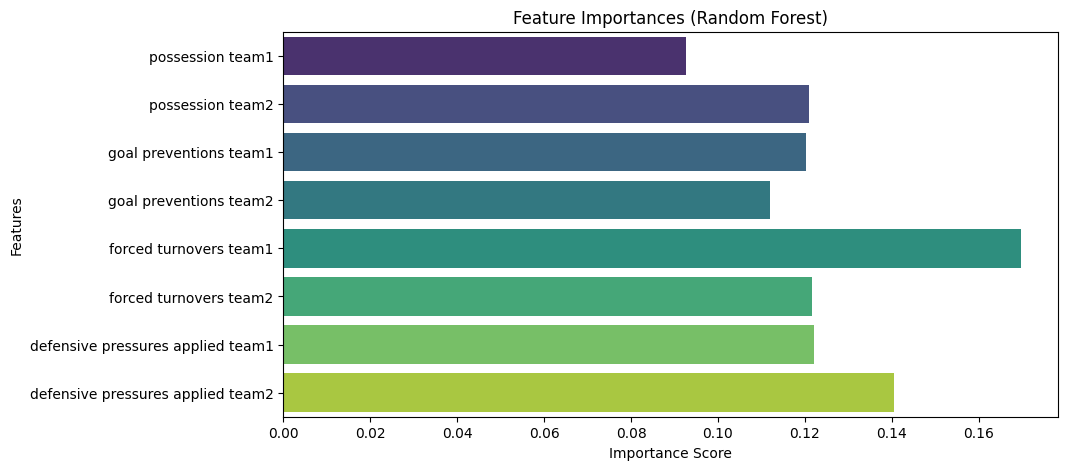

In [ ]:
# displays the importance of each feature in predicting the match result

# Feature importance from the trained model
importances = model.feature_importances_

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## 📌 Conclusion

In this mini project, we analyzed data from the FIFA World Cup 2022 and built machine learning models to predict match outcomes using features like possession, goal preventions, turnovers, and defensive pressures.

### ✅ Key Highlights:
- **Data Cleaning & Preprocessing**: We handled missing values and converted categorical percentages to numerical format.
- **Exploratory Data Analysis (EDA)**: Through heatmaps, histograms, and bar plots, we observed patterns such as team possession impact and feature correlations with match outcomes.
- **Model Building & Evaluation**:
  - **Random Forest Classifier** and **Logistic Regression** were trained on the dataset.
  - Logistic Regression slightly outperformed Random Forest in terms of accuracy and F1 scores.
  - We visualized the confusion matrices and accuracy comparisons to assess performance.
- **Feature Importance**: Defensive pressure and possession were among the most influential features in predicting match results.

### 🎯 Final Takeaway:
While both models show promising results, Logistic Regression provided more consistent predictions for this dataset. With more match-level data or additional contextual features (like player statistics or historical performance), the model's accuracy could be further enhanced.

This project demonstrated the complete workflow of:
- Data Analytics using Python 🐍
- Analysis and visualization in Jupyter Notebooks 📊
- Applying core Data Science & Machine Learning principles 🤖
